# TON/ETH Mining

Comparacion de rendimiento de minado de TonCoin contra Ethereum



In [1]:
# Importar librerias
from datetime import datetime
from datetime import timezone
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [12]:
# Instalar CoinGecko API

# !pip install pycoingecko


In [2]:
# Importar e instalar API

from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()

In [19]:
# Elegir fechas

fromdate = datetime(2021, 11, 15)
todate = datetime(2022, 1, 27)
from_timestamp = fromdate.replace(tzinfo=timezone.utc).timestamp()
to_timestamp = todate.replace(tzinfo=timezone.utc).timestamp()

In [20]:
# Precios de TON en UNIX Timestamps

ton=pd.DataFrame(cg.get_coin_market_chart_range_by_id(id='the-open-network',vs_currency='usd',from_timestamp=from_timestamp,to_timestamp=to_timestamp))

In [21]:
# Precios de ETH en UNIX Timestamps

eth=pd.DataFrame(cg.get_coin_market_chart_range_by_id(id='ethereum',vs_currency='usd',from_timestamp=from_timestamp,to_timestamp=to_timestamp))


In [22]:
eth[['timestamp','price']] = pd.DataFrame(eth.prices.tolist(), index= eth.index)
ton[['timestamp','price']] = pd.DataFrame(ton.prices.tolist(), index= ton.index)
eth['date'] = pd.to_datetime(eth['timestamp'],unit='ms')
ton['date'] = pd.to_datetime(ton['timestamp'],unit='ms')
eth = eth.drop(columns=(["prices","market_caps", "total_volumes", "timestamp"]))
ton = ton.drop(columns=(["prices","market_caps", "total_volumes", "timestamp"]))

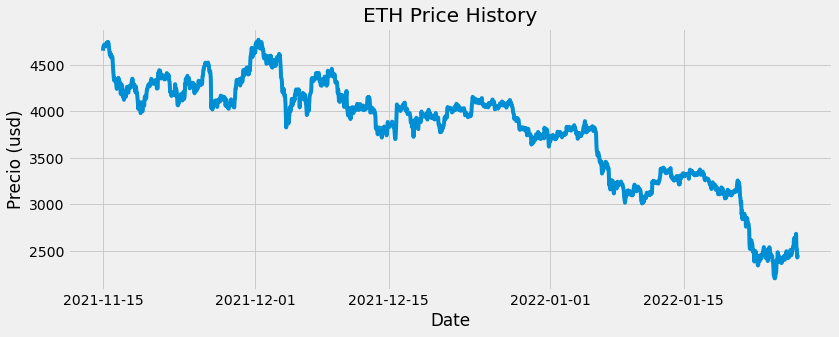

In [25]:
# Graficar ETH

plt.figure(figsize=(12.2,4.5))
plt.plot(eth["date"], eth["price"], label="ETH")
plt.title("ETH Price History")
plt.xlabel("Date")
plt.ylabel("Precio (usd)")
plt.show()

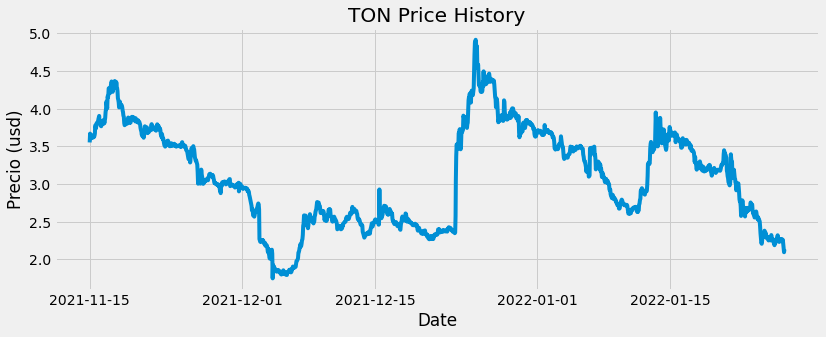

In [26]:
# Graficar TON

plt.figure(figsize=(12.2,4.5))
plt.plot(ton["date"], ton["price"], label="TON")
plt.title("TON Price History")
plt.xlabel("Date")
plt.ylabel("Precio (usd)")
plt.show()

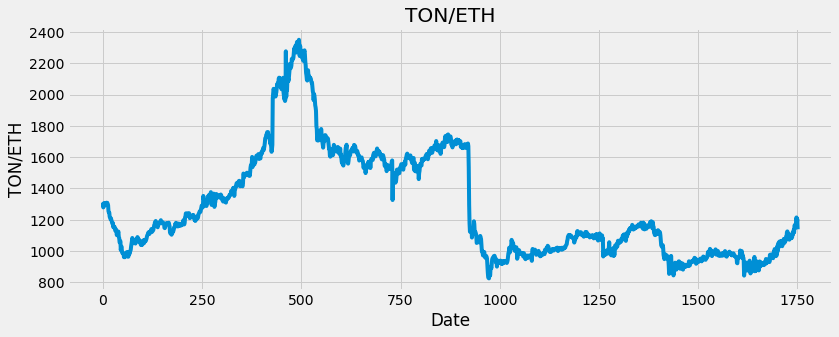

In [27]:
teratio = eth["price"]/ton["price"]

plt.figure(figsize=(12.2,4.5))
plt.plot(teratio, label="TON")
plt.title("TON/ETH")
plt.xlabel("Date")
plt.ylabel("TON/ETH")
plt.show()

In [64]:
# 3,7ton/dia 0,0031eth/dia

3.7/teratio.iloc[-2]

0.003249084925920331